<a href="https://colab.research.google.com/github/bala-101/market_prediction_nifty_50/blob/main/accuracy_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import yfinance as yf
import os

In [30]:
if os.path.exists("nifty50.csv"):
    nifty50 = pd.read_csv("nifty50.csv", index_col=0)
else:
    nifty50 = yf.Ticker("^GSPC")
    nifty50 = nifty50.history(period="max")
    nifty50.to_csv("nifty50.csv")

In [31]:
print(nifty50.head())

                                Open       High        Low      Close  Volume  \
Date                                                                            
1927-12-30 00:00:00-05:00  17.660000  17.660000  17.660000  17.660000       0   
1928-01-03 00:00:00-05:00  17.760000  17.760000  17.760000  17.760000       0   
1928-01-04 00:00:00-05:00  17.719999  17.719999  17.719999  17.719999       0   
1928-01-05 00:00:00-05:00  17.549999  17.549999  17.549999  17.549999       0   
1928-01-06 00:00:00-05:00  17.660000  17.660000  17.660000  17.660000       0   

                           Dividends  Stock Splits  
Date                                                
1927-12-30 00:00:00-05:00        0.0           0.0  
1928-01-03 00:00:00-05:00        0.0           0.0  
1928-01-04 00:00:00-05:00        0.0           0.0  
1928-01-05 00:00:00-05:00        0.0           0.0  
1928-01-06 00:00:00-05:00        0.0           0.0  


In [32]:
nifty50['Date'] = nifty50.index  # Keep 'Date' for reference
nifty50.reset_index(drop=True, inplace=True)

In [33]:
X_linear = nifty50[['Open']].values  # Feature: Open price
y_linear = nifty50['Close'].values  # Target: Close price

In [34]:
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

In [35]:
# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_linear, y_train_linear)

LinearRegression()

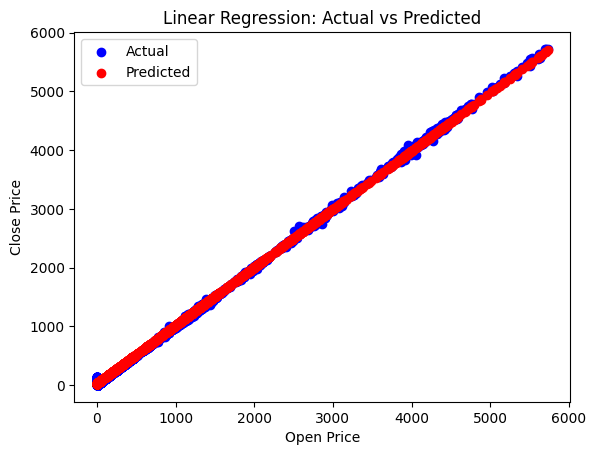

In [36]:
y_pred_linear = linear_model.predict(X_test_linear)
plt.scatter(X_test_linear, y_test_linear, color='blue', label='Actual')
plt.scatter(X_test_linear, y_pred_linear, color='red', label='Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [37]:
nifty50['Target'] = (nifty50['Close'].shift(-1) > nifty50['Close']).astype(int)  # Target: 1 if next day's close is higher

In [38]:

nifty50.dropna(inplace=True)

In [39]:
X_logistic = nifty50[['Open', 'High', 'Low', 'Volume']].values  # Features: Open, High, Low, Volume
y_logistic = nifty50['Target'].values  # Target: Binary classification

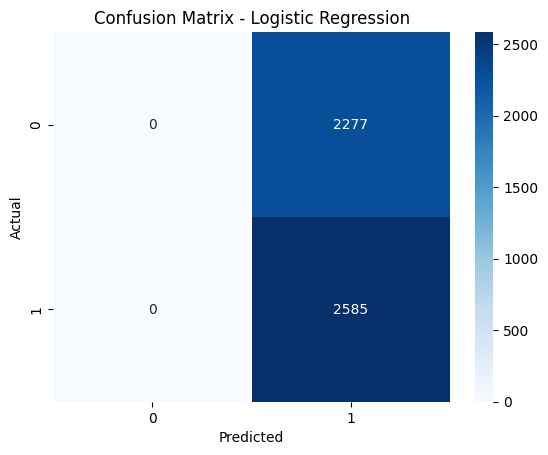

In [40]:
# Split the dataset for Logistic Regression
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

# Train Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_logistic, y_train_logistic)

# Predictions for Logistic Regression
y_pred_logistic = logistic_model.predict(X_test_logistic)
conf_matrix_logistic = confusion_matrix(y_test_logistic, y_pred_logistic)
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)
print(f'Accuracy of Logistic Regression: {accuracy_logistic:.2f}')

Accuracy of Logistic Regression: 0.53


In [42]:
X_classification = nifty50[['Open', 'High', 'Low', 'Volume']].values  # Features: Open, High, Low, Volume
y_classification = nifty50['Target'].values  # Target: Binary classification

# Split the dataset for classification tasks
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification,
                                                                                                                y_classification,
                                                                                                                test_size=0.2,
                                                                                                                random_state=42)

rf_model = RandomForestClassifier()
rf_model.fit(X_train_classification, y_train_classification)

RandomForestClassifier()

In [43]:
# Accuracy for Random Forest
accuracy_rf = accuracy_score(y_test_classification, y_pred_rf)
print(f'Accuracy of Random Forest: {accuracy_rf:.2f}')

Accuracy of Random Forest: 0.51


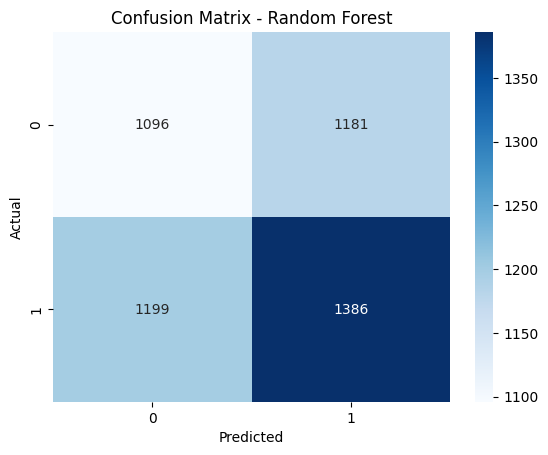

In [44]:
# Prepare data for Random Forest and Decision Tree (using the same features and target as logistic regression)
X_classification = nifty50[['Open', 'High', 'Low', 'Volume']].values  # Features: Open, High, Low, Volume
y_classification = nifty50['Target'].values  # Target: Binary classification

# Split the dataset for classification tasks
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification,y_classification,test_size=0.2,random_state=42)
# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_classification, y_train_classification)

# Predictions and Confusion Matrix for Random Forest
y_pred_rf = rf_model.predict(X_test_classification)
conf_matrix_rf = confusion_matrix(y_test_classification, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [45]:
# Accuracy for Random Forest
accuracy_rf = accuracy_score(y_test_classification, y_pred_rf)
print(f'Accuracy of Random Forest: {accuracy_rf:.2f}')

Accuracy of Random Forest: 0.51


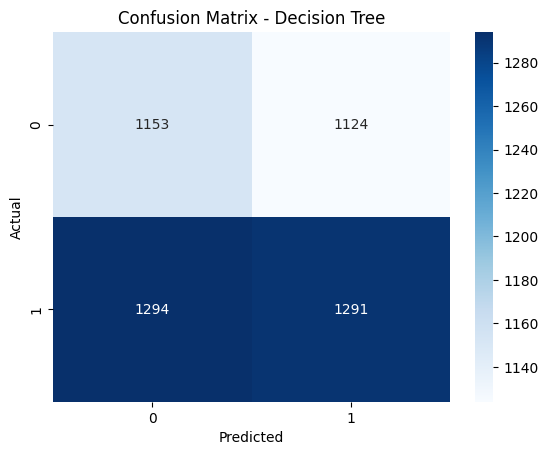

In [46]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_classification, y_train_classification)

# Predictions and Confusion Matrix for Decision Tree
y_pred_dt = dt_model.predict(X_test_classification)
conf_matrix_dt = confusion_matrix(y_test_classification, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [47]:
# Accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test_classification, y_pred_dt)
print(f'Accuracy of Decision Tree: {accuracy_dt:.2f}')

Accuracy of Decision Tree: 0.50
